In [ ]:
# do you see this? - Carlos

In [ ]:
# Hello world! - Michael

In [ ]:
# Checking - Brian

# Scooter Exploration

Members: Brian Kelly, Michael Vandi, Logan Shertz, Charles Karpati

Dataset: Scooter data: 
- Routes: 3 months (September to August 2019)
- Deployment/  
- Routes/ 
- 'Trip origins-destinations by month'/


About Blurb Right Here:

## (Optional) Local File Access

In [ ]:
# (Optional) Run this cell to gain access to Google Drive (Colabs only) 
from google.colab import drive

# Colabs operates in a virtualized enviornment
# Colabs default directory is at ~/content.
# We mount Drive into a temporary folder at '~/content/drive' 

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Your file path will be different
! cd ./drive/'My Drive'/colabs/DATA/scooter

/bin/bash: line 0: cd: ./drive/My Drive/colabs/DATA/scooter: No such file or directory


In [ ]:
# Brian: Path to Scooter Data
! cd drive/'My Drive'/BNIA/responsive_records

In [ ]:
ls

In [ ]:
! pip install dexplot

In [ ]:
!pip install folium

In [ ]:
!pip install geopandas

In [ ]:
pip install ipyleaflet

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import dexplot as dxp
import folium as fol
import json
from ipyleaflet import Map, GeoData, basemaps, LayersControl

### File Access Conveince Functions 

In [ ]:
# Find Relative Path to Files
def findFile(root, file):
    for d, subD, f in os.walk(root):
        if file in f:
            return "{1}/{0}".format(file, d)
            break 

# To 'import' a script you wrote, map its filepath into the sys
def addPath(root, file): sys.path.append(os.path.abspath( findFile( './', file) ))

In [ ]:
findFile('./', 'Routing September 2019.geojson')

'./drive/My Drive/BNIA/responsive_records/Routes/Routing September 2019.geojson'

In [ ]:
ls

drive/  sample_data/


## Inspect Deployment Data

In [ ]:
ls Deployment

ls: cannot access 'Deployment': No such file or directory


In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.
fileName = "Daily Deployment average by block September 2019.csv"  #@param ['Daily Deployment average by block August 2019.csv', 'Daily Deployment average by block December 2019.csv', 'Daily Deployment average by block November 2019.csv', 'Daily Deployment average by block October 2019.csv', 'Daily Deployment average by block September 2019.csv']
#@markdown ---

df = pd.read_csv( findFile('./', fileName) )

df.head()

,id,value,name
0,1,NaN,Block 245102502063018
1,2,NaN,Block 245102006001022
2,3,NaN,Block 245102804033017
3,4,NaN,Block 245102716006003
4,5,NaN,Block 245102709023013


In [ ]:
df.value.unique()

In [ ]:
df.value.describe()

In [ ]:
df.value.var() # Return unbiased variance over requested axis.

In [ ]:
df.value.sem() # Return unbiased standard error of the mean over requested axis.

In [ ]:
df.value.nunique()	# Count distinct observations over requested axis.

In [ ]:
# DataFrame.shape	Return a tuple representing the dimensionality of the DataFrame.
df.shape

#DataFrame.size	Return an int representing the number of elements in this object.
df.size

# DataFrame.ndim	Return an int representing the number of axes / array dimensions.
df.ndim

# Note Used : 
# DataFrame.axes	Return a list representing the axes of the DataFrame.

df.dtypes

# Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0).
df.kurtosis()

In [ ]:
df['nameChange1'] = df.name.str.replace('Block ', '')
df['nameChange2'] = df['nameChange1'].map(lambda x: str(x)[:-4])
df['nameChange1Remainder'] = df['nameChange2'].map(lambda x: str(x)[-4:])
scooterdf = df.copy()

### Load Tracts

In [ ]:
# This will just beautify the output

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('max_colwidth', 20)

In [ ]:
# The attributes are what we will use.
in_crs = 2248 # The CRS we recieve our data 
out_crs = 4326 # The CRS we would like to have our data represented as
geom = 'geometry' # The column where our spatial information lives.

# A Url to load
boundariesBaltimoreTractsNoWater2010 = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8xXdUaT17jkdK0MWTJpg3GOy6jMWeaXTlguXNjCSb8Vr_FanSZQRaTU-m811fQz4kyMFK5wcahMNY/pub?gid=886223646&single=true&output=csv"

# Read in the dataframe
gdf = pd.read_csv(boundariesBaltimoreTractsNoWater2010)

# Convert the geometry column datatype from a string of text into a coordinate datatype
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads( str(x) ))

# Process the dataframe as a geodataframe with a known CRS and geom column
gdf = GeoDataFrame(gdf, crs=in_crs, geometry='geometry')

NameError: ignored

In [ ]:
boundariesBaltimoreTractsNoWater2010.head()

Ensure merge is on consistent datatypes

In [ ]:
gdf['GEOID10'] = gdf['GEOID10'].astype(str)
scooterdf['nameChange2'] = scooterdf['nameChange2'].astype(str)

Perform the merge

In [ ]:
scooterdfClean = gdf.merge(scooterdf, left_on='GEOID10', right_on='nameChange2').drop(['name', 'nameChange1', 'nameChange2'], axis=1)

In [ ]:
scooterdfClean.head()

In [ ]:
# scooterdf.to_csv('./scooterdf.csv', index=False)
# gdf.drop(columns='geometry').to_csv('./boundsdf.csv', index=False)

In [ ]:
ls

In [ ]:
scooterdfClean.groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.value.isna().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='notApplicable')

In [ ]:
scooterdfClean.value.notnull().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='NotMissingCount')

In [ ]:
scooterdfClean.value.isnull().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='NumberMissingCount')

In [ ]:
scooterdfClean.fillna(-1).groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.groupby('CSA')['value'].mean()

In [ ]:
scooterdfClean.groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.CSA.value_counts()

In [ ]:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

## Inspect Routes Data

In [ ]:
ls Routes

In [ ]:
m = fol.Map(location = [39.2, -76.6])

In [ ]:
m

In [ ]:
#@title Example form fields
#@markdown Forms support many types of fields.
fileName = "Routing September 2019.geojson"  #@param ['Routing August 2019.geojson', 'Routing October 2019.geojson', 'Routing December 2019.geojson', 'Routing September 2019.geojson', 'Routing November 2019.geojson']
columnName = "color"  #@param ['id', 'color', 'streetname', 'trip_count_sum', 'trip_count_average', 'trip_count_percent']
#@markdown ---

gdf = gpd.read_file( findFile('./', fileName) )

gdf.plot( column = columnName)
gdf.columns
gdf.head(5)

Index(['id', 'color', 'streetname', 'trip_count_sum', 'trip_count_average',
       'trip_count_percent', 'geometry'],
      dtype='object')

,id,color,streetname,trip_count_sum,trip_count_average,trip_count_percent
0,150197772,"rgb(213, 228, 239)",Jefferson Street,94,3.03,0.0%
1,150155955,"rgb(160, 185, 216)",,790,25.48,0.4%
2,150191673,"rgb(202, 219, 235)",Harford Avenue,164,5.29,0.1%
3,150184657,"rgb(224, 236, 244)",,45,1.45,0.0%
4,150188407,"rgb(165, 190, 219)",,655,21.13,0.3%


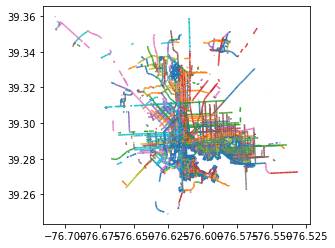

In [ ]:
# @title Example form fields
#@markdown Forms support many types of fields.
fileName = 'Routing October 2019.geojson'  #@param ['Routing August 2019.geojson', 'Routing October 2019.geojson', 'Routing December 2019.geojson', 'Routing September 2019.geojson', 'Routing November 2019.geojson']
columnName = "streetname"  #@param ['id', 'color', 'streetname', 'trip_count_sum', 'trip_count_average', 'trip_count_percent']



#@markdown ---

gdf = gpd.read_file( findFile('./', fileName) )



gdf.plot( column = columnName)
gdf.columns
gdf [['id', 'color', 'streetname', 'trip_count_sum', 'trip_count_average', 'trip_count_percent']].head(5)

In [ ]:
#@title Pretty Map
#@markdown Switches Between Fields

from ipyleaflet import Map, GeoData, basemaps, LayersControl


routes =  'Routing December 2019.geojson'  #@param ['Routing August 2019.geojson', 'Routing October 2019.geojson', 'Routing December 2019.geojson', 'Routing September 2019.geojson', 'Routing November 2019.geojson']
##rivers = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")

m = Map(center=(39.2, -76.6), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

geo_data = GeoData(geo_dataframe = countries,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')

rivers_data = GeoData(geo_dataframe = rivers,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Rivers')

m.add_layer(rivers_data)
m.add_layer(geo_data)
m.add_control(LayersControl())

m

In [ ]:

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
rivers = gpd.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")

m = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

geo_data = GeoData(geo_dataframe = countries,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')

rivers_data = GeoData(geo_dataframe = rivers,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Rivers')

m.add_layer(rivers_data)
m.add_layer(geo_data)
m.add_control(LayersControl())

m

URLError: ignored

In [ ]:
dxp.bar(x = "streetname", y = "trip_count_sum", data = gdf, aggfunc = "median", sort_values = 'desc')

Ensuring the Merge is consistent on Data Types (Route)

In [ ]:
gdf['GEOID10'] = gdf['GEOID10'].astype(str)
scooterdf['nameChange2'] = scooterdf['nameChange2'].astype(str)

In [ ]:
scooterdfClean = gdf.merge(scooterdf, left_on='GEOID10', right_on='nameChange2').drop(['name', 'nameChange1', 'nameChange2'], axis=1)

In [ ]:
scooterdfClean.head()

In [ ]:
# scooterdf.to_csv('./scooterdf.csv', index=False)
# gdf.drop(columns='geometry').to_csv('./boundsdf.csv', index=False)

In [ ]:
ls

In [ ]:
scooterdfClean.groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.value.isna().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='notApplicable')

In [ ]:
scooterdfClean.value.notnull().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='NotMissingCount')

In [ ]:
scooterdfClean.value.isnull().groupby([scooterdfClean['CSA']]).sum().astype(int).reset_index(name='NumberMissingCount')

In [ ]:
scooterdfClean.fillna(-1).groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.groupby('CSA')['value'].mean()

In [ ]:
scooterdfClean.groupby('CSA')['value'].sum()

In [ ]:
scooterdfClean.CSA.value_counts()

## Inspect Origins-Destinations Data

In [ ]:
ls 'Trip origins-destinations by month'

In [ ]:
# @title Example form fields
#@markdown Forms support many types of fields.
fileName = 'Trip Destinations by block August 2019.geojson'  #@param ['Trip Destinations by block August 2019.geojson', 'Trip Destinations by block December 2019.geojson', 'Trip Destinations by block November 2019.geojson', 'Trip Destinations by block October 2019.geojson', 'Trip Destinations by block September 2019.geojson', 'Trip Origins by block August 2019.geojson', 'Trip Origins by block December 2019.geojson', 'Trip Origins by block November 2019.geojson', 'Trip Origins by block October 2019.geojson', 'Trip Origins by block September 2019.geojson']
columnName = "name"  #@param ['name', 'value', 'color', 'radius']

#@markdown ---

gdf = gpd.read_file( findFile('./', fileName) )

gdf.plot( column = columnName)
gdf.columns
gdf[['id','name', 'value', 'color', 'radius']].head(5)

In [ ]:
dxp.bar(x='color', y='value', data=gdf, aggfunc='median')

In [ ]:
dxp.scatter(x = "color", y = "value", data = gdf, aggfunc = "median")